DecisionTreeClassifier - Titanic M.L. Disaster

1.-Cargar datos

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# --- 1. Carga y Preparación de Datos ---
df = sns.load_dataset('titanic')
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'
df_processed = df[features + [target]].copy()
df_processed['age'].fillna(df_processed['age'].median(), inplace=True)
df_processed['embarked'].fillna(df_processed['embarked'].mode()[0], inplace=True)
df_processed_full = pd.get_dummies(df_processed, columns=['sex', 'embarked'], drop_first=True)
X_full = df_processed_full.drop('survived', axis=1)
y = df_processed_full['survived']

C:\Users\alans\AppData\Local\Temp\ipykernel_16356\4167605311.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['age'].fillna(df_processed['age'].median(), inplace=True)
C:\Users\alans\AppData\Local\Temp\ipykernel_16356\4167605311.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

2.-Graficar antes de trabajar con los datos / DATOS REALES


--- Gráfica 'Antes': Dispersión Real de Pasajeros por Edad y Tarifa ---


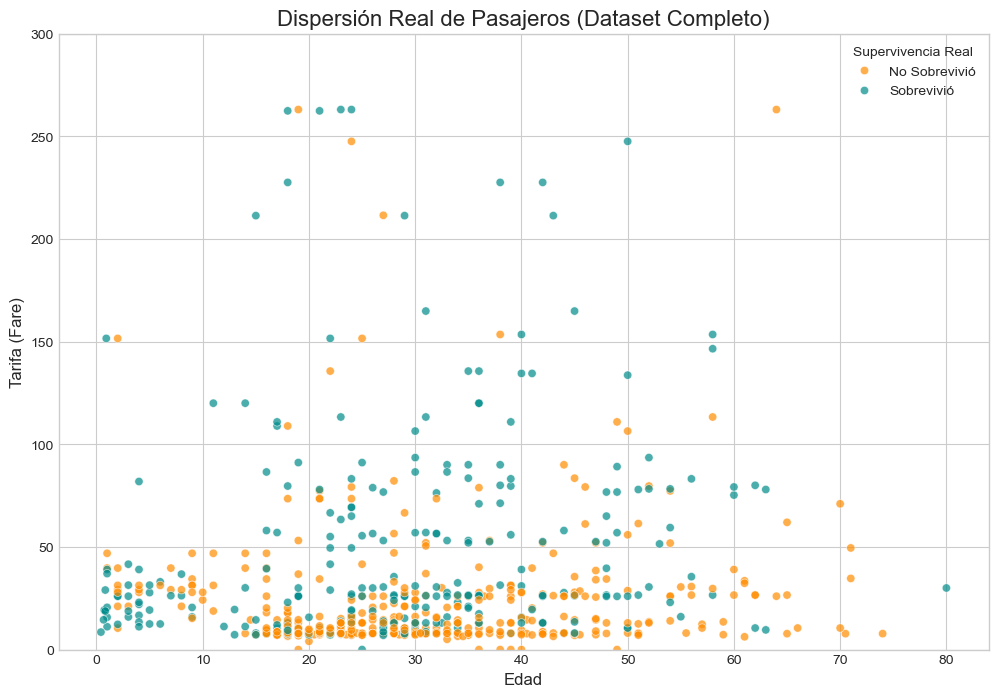

In [37]:
# --- 2. GRÁFICA "ANTES": Dispersión Real por Edad y Tarifa ---
print("\n--- Gráfica 'Antes': Dispersión Real de Pasajeros por Edad y Tarifa ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Guardamos la gráfica en la variable 'ax' para poder acceder a su leyenda
ax = sns.scatterplot(data=df, x='age', y='fare', hue='survived',
                     palette=['darkorange', 'darkcyan'], alpha=0.7)

ax.set_title("Dispersión Real de Pasajeros (Dataset Completo)", fontsize=16)
ax.set_xlabel("Edad", fontsize=12)
ax.set_ylabel("Tarifa (Fare)", fontsize=12)
ax.set_ylim(0, 300) # Limitar el eje Y para una mejor visualización

# --- FORMA CORRECTA DE MODIFICAR LA LEYENDA ---
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Supervivencia Real', labels=['No Sobrevivió', 'Sobrevivió'])

plt.grid(True)
plt.show()


4.-Entrenar modelo

In [39]:
# --- 3. Entrenamiento del Modelo y Métricas ---
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
clf_full = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_full.fit(X_train_full, y_train)
y_pred = clf_full.predict(X_test_full)

5.-Visualizar modelo

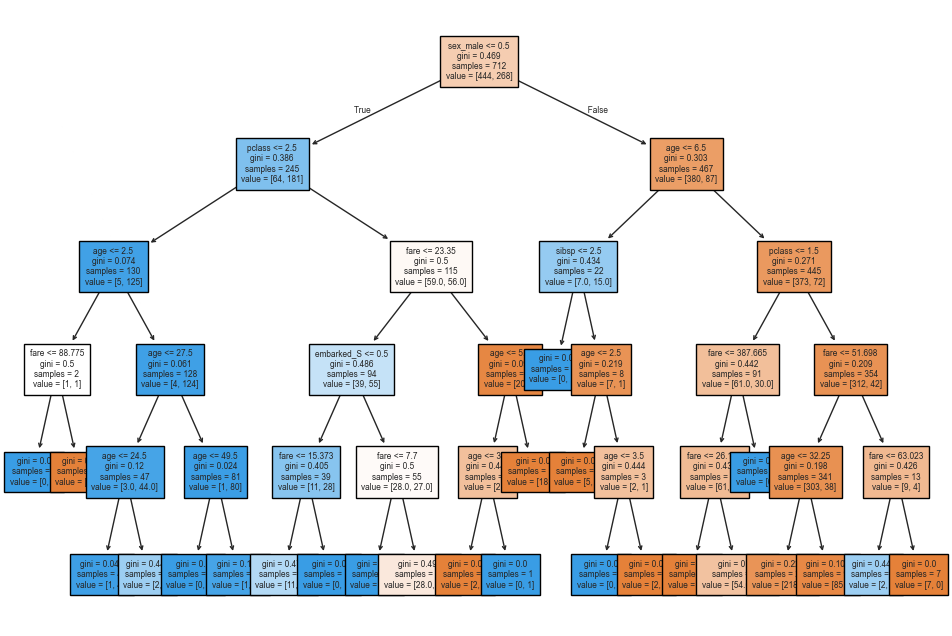

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(decision_tree=clf_full,feature_names=X_train_full.columns,filled=True,fontsize=6);

7.-Metricas

In [41]:
# --- 4. Métricas de Evaluación ---
print("\n--- 2. Métricas de Evaluación del Modelo ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"✅ Accuracy (Exactitud): {accuracy:.4f}")
print(f"🎯 Precision (Precisión): {precision:.4f}")
print(f"🔄 Recall (Sensibilidad): {recall:.4f}")
print(f"⚖️ F1-Score: {f1:.4f}")


--- 2. Métricas de Evaluación del Modelo ---
✅ Accuracy (Exactitud): 0.7989
🎯 Precision (Precisión): 0.8276
🔄 Recall (Sensibilidad): 0.6486
⚖️ F1-Score: 0.7273


8.-Matriz de confusion


--- 3. Matriz de Confusión ---


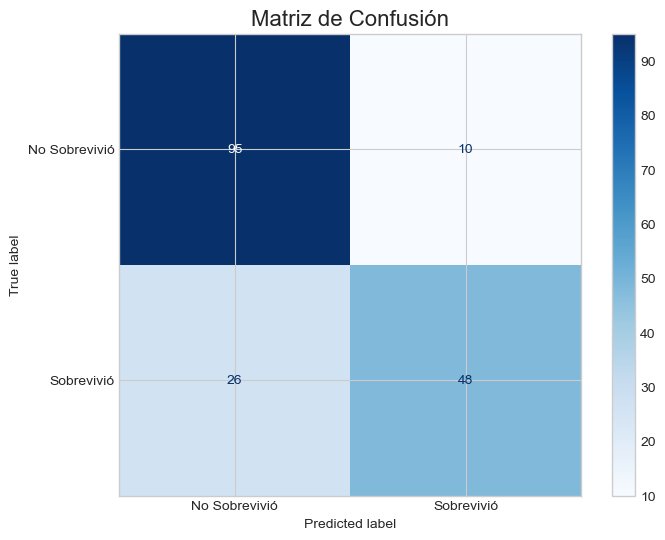

In [42]:
# --- 5. Matriz de Confusión ---
print("\n--- 3. Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Sobrevivió', 'Sobrevivió'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title('Matriz de Confusión', fontsize=16)
plt.show()

9.-Grafica despues de aplicar el modelo


--- Gráfica 'Después': Fronteras de Decisión del Modelo ---


C:\Users\alans\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


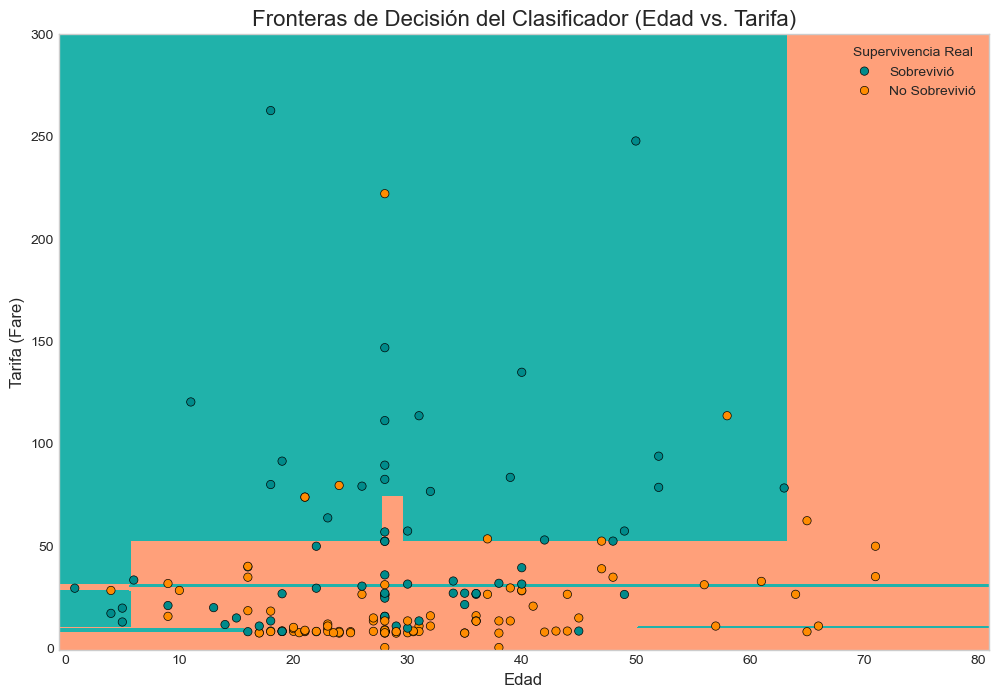

In [43]:
# --- 4. GRÁFICA "DESPUÉS": FRONTERAS DE DECISIÓN ---
print("\n--- Gráfica 'Después': Fronteras de Decisión del Modelo ---")

features_visual = ['age', 'fare']
X_visual = df_processed_full[features_visual]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visual, y, test_size=0.2, random_state=42)
clf_visual = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_visual.fit(X_train_vis, y_train_vis)

cmap_light = ListedColormap(['#FFA07A', '#20B2AA'])
cmap_bold = ['darkorange', 'darkcyan']

h = .5
x_min, x_max = X_visual['age'].min() - 1, X_visual['age'].max() + 1
y_min, y_max = X_visual['fare'].min() - 1, X_visual['fare'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X_test_vis['age'], y=X_test_vis['fare'], hue=y_test_vis,
                palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), 300) # Limitar el eje Y para mejor visualización
plt.title("Fronteras de Decisión del Clasificador (Edad vs. Tarifa)", fontsize=16)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Tarifa (Fare)", fontsize=12)
plt.legend(title='Supervivencia Real', labels=['Sobrevivió', 'No Sobrevivió'])
plt.show()

DecisionTreeClassifier - MNIST

1.-Cargar datos

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# --- 1. Carga y Preparación de Datos (MNIST) ---
print("Cargando el dataset MNIST... (puede tardar un momento)")
# Carga los datos desde OpenML. Contiene 70,000 imágenes.
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Para que el proceso sea más rápido, usaremos una muestra más pequeña
sample_indices = np.random.choice(mnist.data.shape[0], 10000, replace=False)
X = mnist.data[sample_indices]
y = mnist.target[sample_indices].astype(int) # Convertir etiquetas a enteros

# Preprocesamiento: Escalar los píxeles de 0-255 a 0-1
X_scaled = X / 255.0

# --- Paso Clave: Reducción de Dimensionalidad con PCA ---
print("Aplicando PCA para reducir de 784 a 2 dimensiones...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Cargando el dataset MNIST... (puede tardar un momento)
Aplicando PCA para reducir de 784 a 2 dimensiones...


2.-Graficar antes de trabajar con los datos


--- Gráfica 'Antes': Dispersión de los dígitos (reducidos a 2D) ---


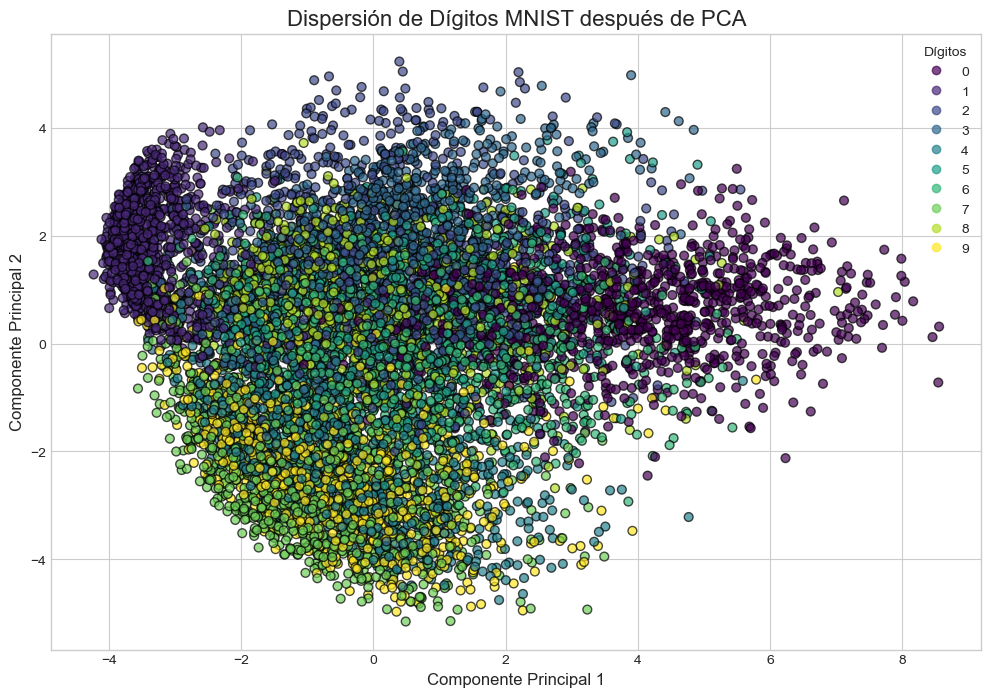

In [45]:
# --- 2. GRÁFICA "ANTES": Dispersión de los Dígitos en 2D ---
print("\n--- Gráfica 'Antes': Dispersión de los dígitos (reducidos a 2D) ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# El color (hue) será el dígito real (0-9)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolor='k', s=40)

plt.title("Dispersión de Dígitos MNIST después de PCA", fontsize=16)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)), title="Dígitos")
plt.grid(True)
plt.show()


4.-Entrenar modelo

In [46]:
# --- 3. Entrenamiento del Modelo y Métricas (sobre los datos PCA) ---
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


5.-Visualizar modelo


--- Visualización del Árbol de Decisión ---


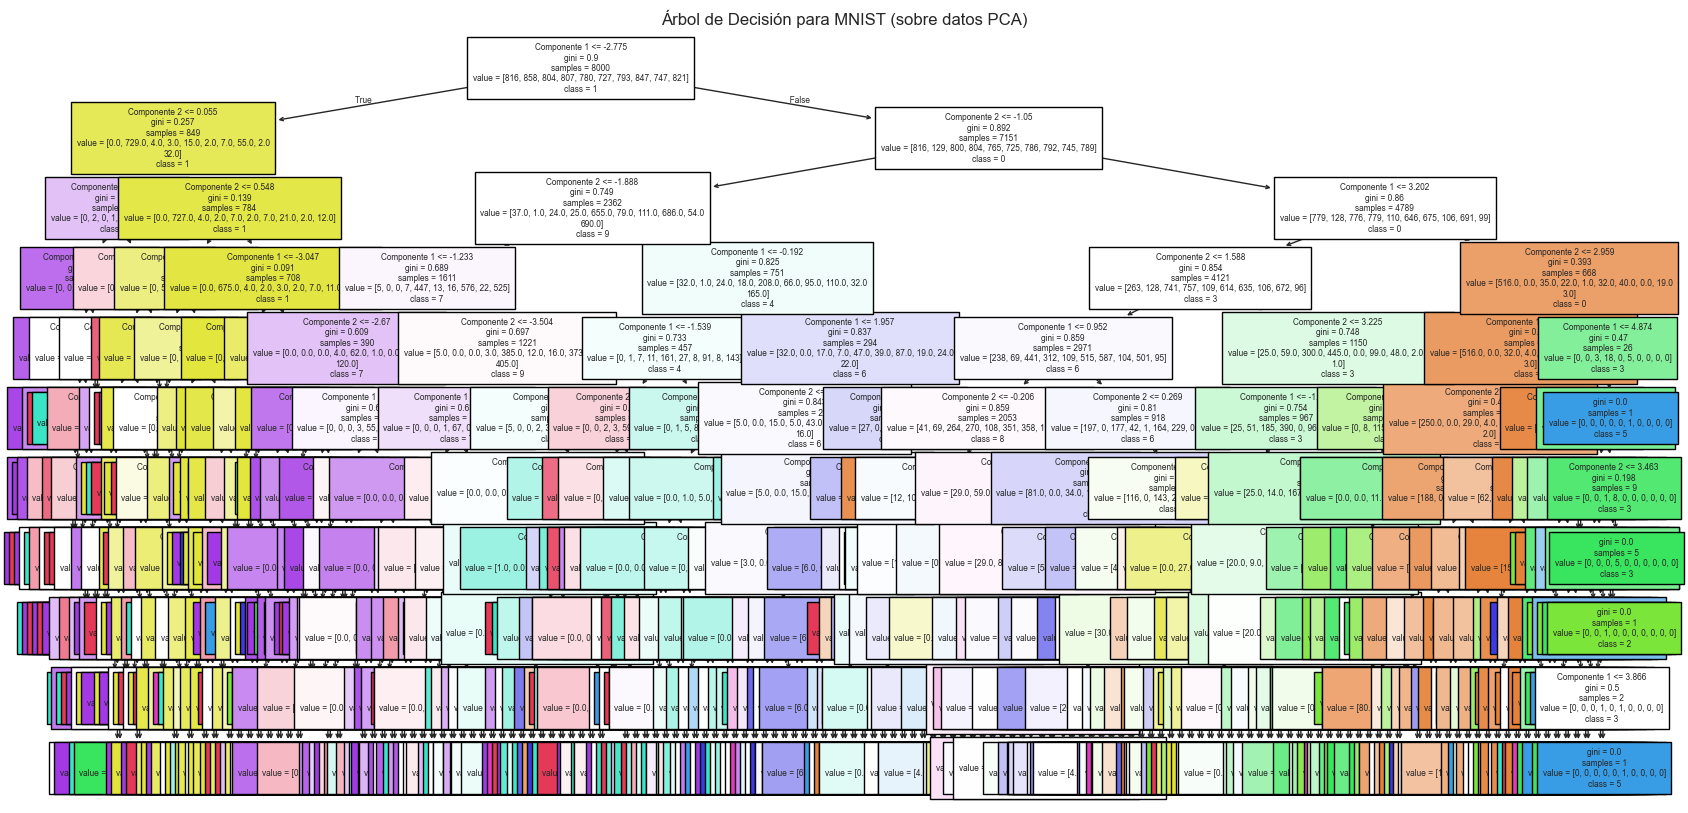

In [47]:
# --- Visualización del Árbol (opcional, puede ser muy grande) ---
# Un árbol para 10 clases puede ser difícil de interpretar, pero aquí está el código
print("\n--- Visualización del Árbol de Decisión ---")
plt.figure(figsize=(20, 10))
plot_tree(decision_tree=clf, 
          feature_names=['Componente 1', 'Componente 2'], 
          class_names=[str(i) for i in range(10)], # Nombres de clase 0 a 9
          filled=True, 
          fontsize=6)
plt.title("Árbol de Decisión para MNIST (sobre datos PCA)")
plt.show()

7.-Metricas

In [48]:
# --- 4. Métricas de Evaluación ---
print("\n--- Métricas de Evaluación del Modelo ---")
# Para problemas multiclase, se debe especificar el tipo de promedio para precision, recall y f1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"✅ Accuracy (Exactitud): {accuracy:.4f}")
print(f"🎯 Precision (Promedio Macro): {precision:.4f}")
print(f"🔄 Recall (Promedio Macro): {recall:.4f}")
print(f"⚖️ F1-Score (Promedio Macro): {f1:.4f}")


--- Métricas de Evaluación del Modelo ---
✅ Accuracy (Exactitud): 0.4335
🎯 Precision (Promedio Macro): 0.4218
🔄 Recall (Promedio Macro): 0.4194
⚖️ F1-Score (Promedio Macro): 0.4143


8.-Matriz de confusion


--- Matriz de Confusión ---


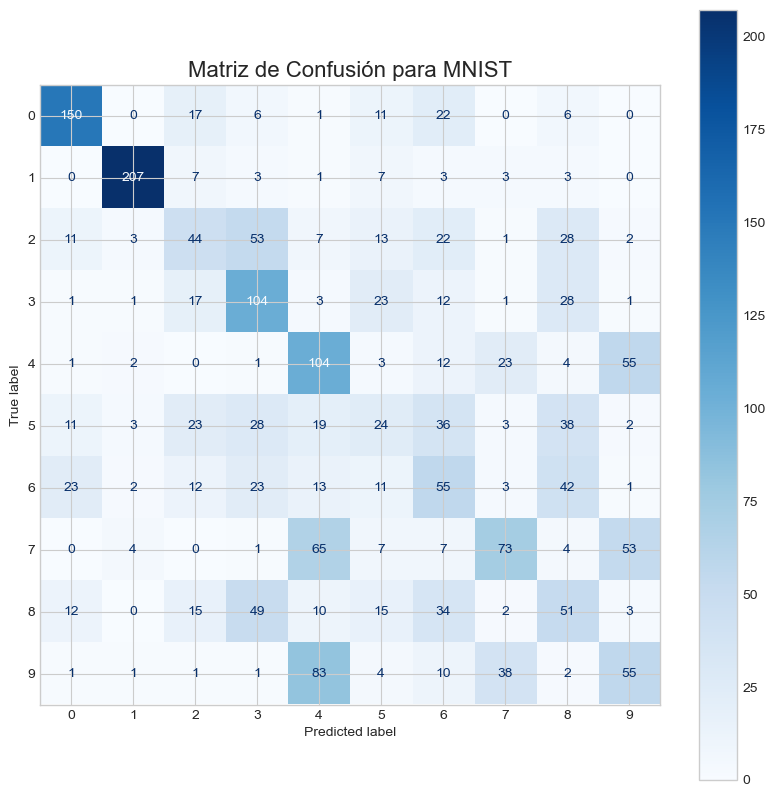

In [49]:
# --- 5. Matriz de Confusión ---
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
# Creamos las etiquetas para los 10 dígitos
class_labels = [str(i) for i in range(10)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# La matriz será de 10x10, por lo que necesita más espacio
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title('Matriz de Confusión para MNIST', fontsize=16)
plt.show()

9.-Grafica despues de aplicar el modelo


--- Gráfica 'Después': Fronteras de Decisión del Modelo ---


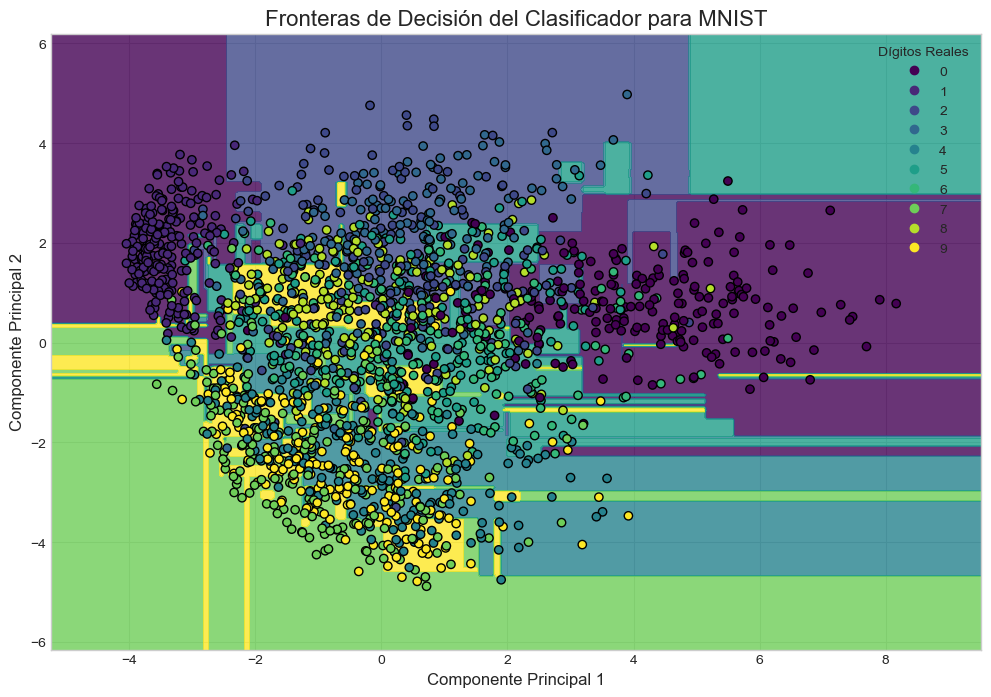

In [50]:
# --- 6. GRÁFICA "DESPUÉS": FRONTERAS DE DECISIÓN ---
print("\n--- Gráfica 'Después': Fronteras de Decisión del Modelo ---")

h = .05
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(plt.cm.viridis(np.linspace(0, 1, 10)))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Dibujar los puntos de datos reales del conjunto de prueba
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Fronteras de Decisión del Clasificador para MNIST", fontsize=16)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)

# Crear la leyenda para la gráfica final
legend2 = plt.legend(handles=scatter_test.legend_elements()[0], labels=list(range(10)), title="Dígitos Reales")
plt.grid(True)
plt.show()

DecisionTreeClassifier - Spam vs Ham

Cargando el dataset desde 'spamhamdata.csv'...
Vectorizando texto con TF-IDF...
Aplicando PCA para reducir a 2 dimensiones...

--- Gráfica 'Antes': Dispersión de los mensajes (reducidos a 2D) ---


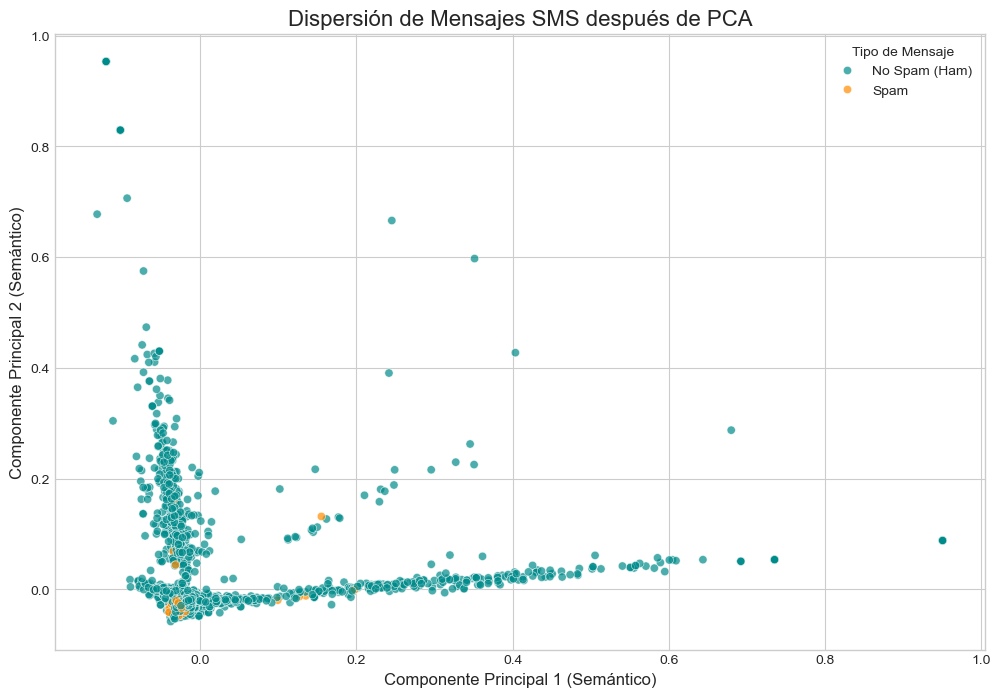


--- Métricas de Evaluación del Modelo ---
✅ Accuracy (Exactitud): 0.8744
🎯 Precision: 0.5455
🔄 Recall: 0.3624
⚖️ F1-Score: 0.4355

--- Matriz de Confusión ---


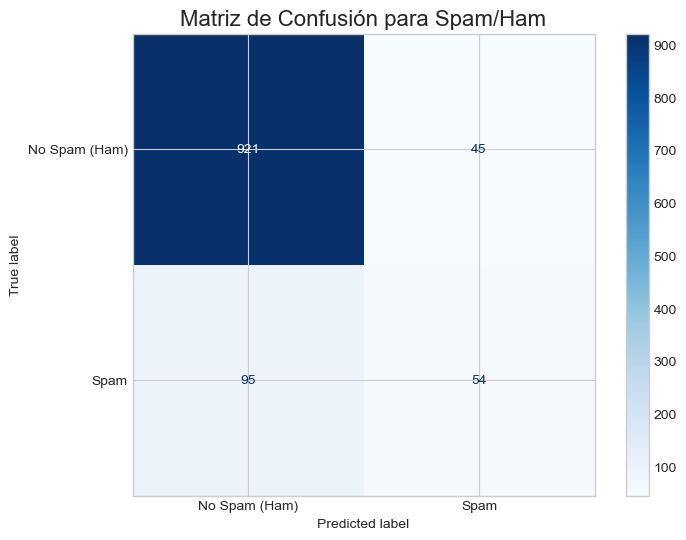


--- Gráfica 'Después': Fronteras de Decisión del Modelo ---


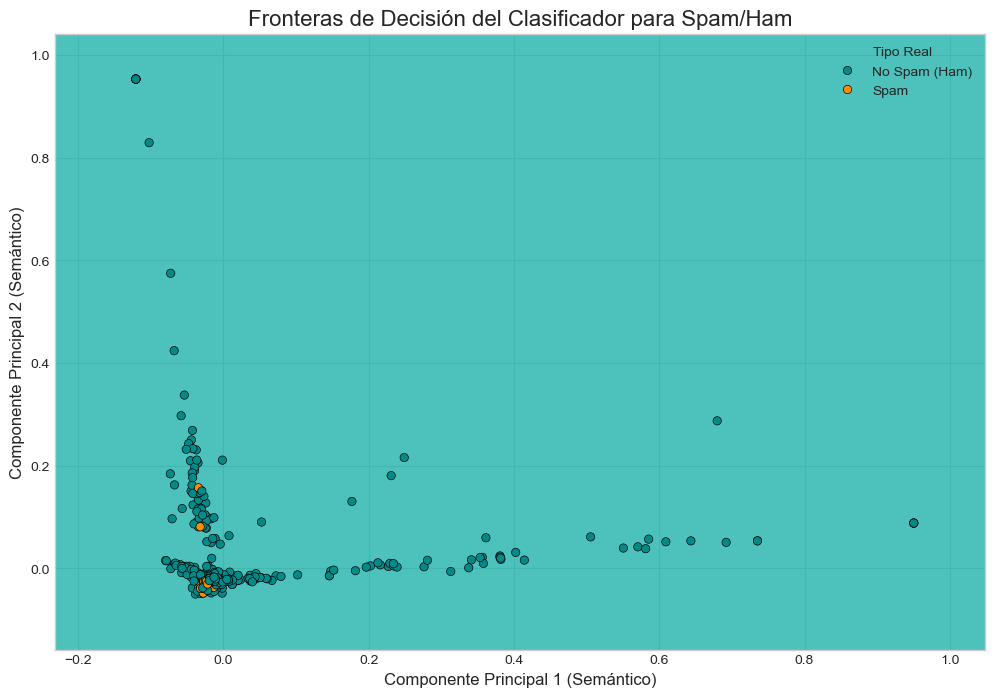

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# --- 1. Carga y Preparación de Datos (desde archivo local) ---
print("Cargando el dataset desde 'spamhamdata.csv'...")
filepath = 'spamhamdata.csv'

try:
    # --- LÍNEA CORREGIDA ---
    # Añadimos sep='\t' para indicar que el separador es una tabulación.
    df = pd.read_csv(filepath, sep='\t', header=None, names=['label', 'message'], encoding='latin1')
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{filepath}'.")
    print("Asegúrate de que el archivo CSV está en la misma carpeta que tu script de Python.")
    exit()

# Convertir etiquetas a números: 0 para 'ham' (no spam), 1 para 'spam'
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Manejar posibles valores nulos que puedan surgir si hay filas vacías
df.dropna(inplace=True)

X_text = df['message']
y = df['label_num']

# --- 2. Vectorización de Texto y Reducción de Dimensionalidad ---
print("Vectorizando texto con TF-IDF...")
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X_text)

print("Aplicando PCA para reducir a 2 dimensiones...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# --- 3. GRÁFICA "ANTES": Dispersión de los Mensajes en 2D ---
print("\n--- Gráfica 'Antes': Dispersión de los mensajes (reducidos a 2D) ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

df_pca = pd.DataFrame(X_pca, columns=['Componente 1', 'Componente 2'])
# Asegurarnos de que el 'label' corresponda a los datos después de dropear NaNs
df_pca['label'] = df['label'] 

ax = sns.scatterplot(data=df_pca, x='Componente 1', y='Componente 2', hue='label',
                     palette=['darkcyan', 'darkorange'], alpha=0.7)

ax.set_title("Dispersión de Mensajes SMS después de PCA", fontsize=16)
ax.set_xlabel("Componente Principal 1 (Semántico)", fontsize=12)
ax.set_ylabel("Componente Principal 2 (Semántico)", fontsize=12)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Tipo de Mensaje', labels=['No Spam (Ham)', 'Spam'])
plt.grid(True)
plt.show()

# --- 4. Entrenamiento del Modelo y Métricas ---
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n--- Métricas de Evaluación del Modelo ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy (Exactitud): {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔄 Recall: {recall:.4f}")
print(f"⚖️ F1-Score: {f1:.4f}")

# --- 5. Matriz de Confusión ---
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Spam (Ham)', 'Spam'])
fig, ax_cm = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax_cm, cmap=plt.cm.Blues)
ax_cm.set_title('Matriz de Confusión para Spam/Ham', fontsize=16)
plt.show()

# --- 6. GRÁFICA "DESPUÉS": FRONTERAS DE DECISIÓN ---
print("\n--- Gráfica 'Después': Fronteras de Decisión del Modelo ---")

h = .02
x_min, x_max = X_pca[:, 0].min() - 0.1, X_pca[:, 0].max() + 0.1
y_min, y_max = X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(['#20B2AA', '#FFA07A'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

ax2 = sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test,
                      palette=['darkcyan', 'darkorange'], alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Fronteras de Decisión del Clasificador para Spam/Ham", fontsize=16)
plt.xlabel("Componente Principal 1 (Semántico)", fontsize=12)
plt.ylabel("Componente Principal 2 (Semántico)", fontsize=12)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, title='Tipo Real', labels=['No Spam (Ham)', 'Spam'])
plt.grid(True)
plt.show()

RandomForestClassifier - Breast Cancer Wisconsin

Cargando el dataset Breast Cancer Wisconsin...
Aplicando PCA para reducir de 30 a 2 dimensiones...

--- Gráfica 'Antes': Dispersión de los datos (reducidos a 2D) ---


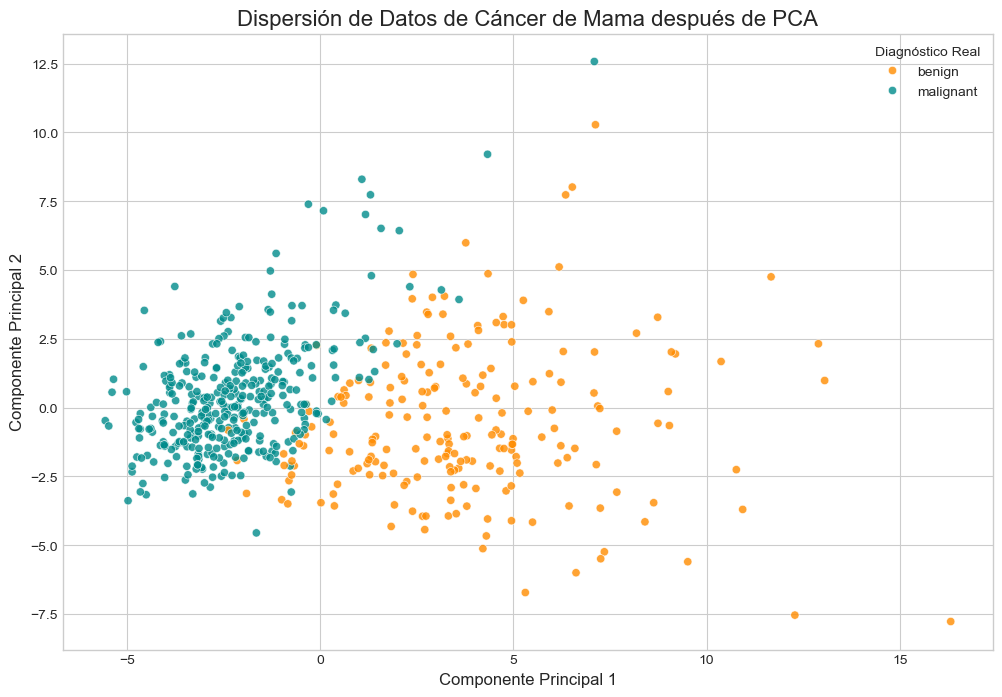


--- Métricas de Evaluación del Modelo ---
✅ Accuracy (Exactitud): 0.9825
🎯 Precision: 0.9726
🔄 Recall: 1.0000
⚖️ F1-Score: 0.9861

--- Matriz de Confusión ---


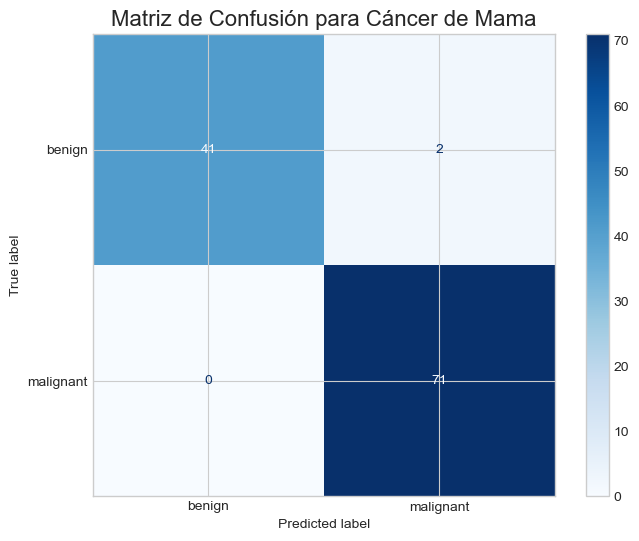


--- Gráfica 'Después': Fronteras de Decisión del RandomForest ---


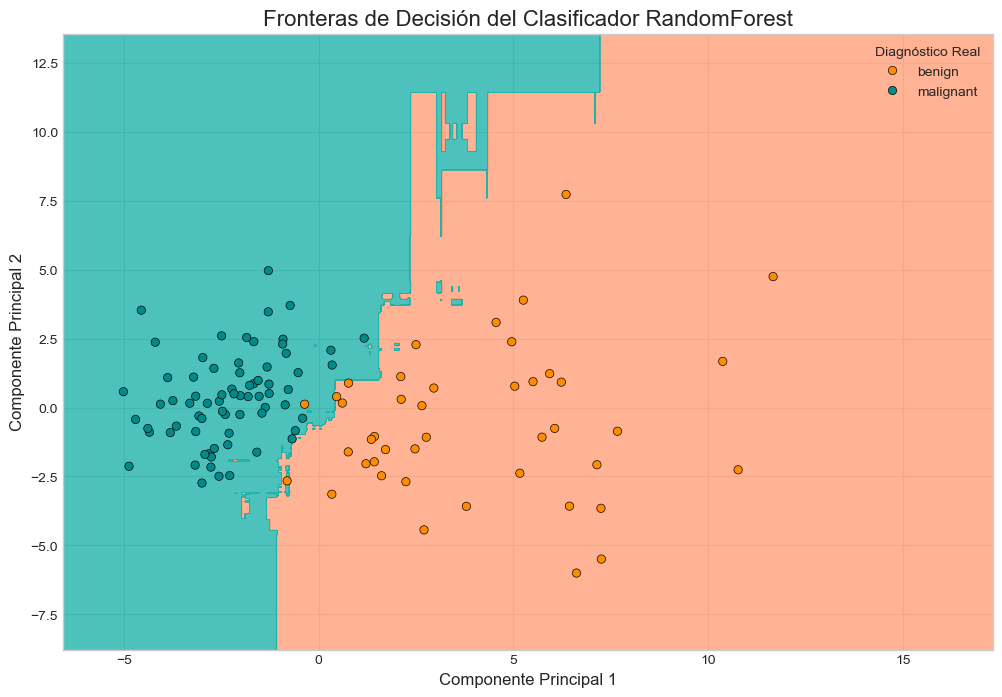

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# --- 1. Carga y Preparación de Datos (Breast Cancer) ---
print("Cargando el dataset Breast Cancer Wisconsin...")
# Cargar el dataset desde sklearn
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# Nombres de las clases: 0 para 'malignant', 1 para 'benign'
class_names = cancer.target_names

# Preprocesamiento: Escalar los datos es importante para PCA
# StandardScaler hace que cada característica tenga una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- 2. Reducción de Dimensionalidad con PCA ---
print("Aplicando PCA para reducir de 30 a 2 dimensiones...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# --- 3. GRÁFICA "ANTES": Dispersión de los Tumores en 2D ---
print("\n--- Gráfica 'Antes': Dispersión de los datos (reducidos a 2D) ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Creamos un DataFrame para graficar fácilmente
df_pca = pd.DataFrame(X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['label'] = y

# Guardamos la gráfica en la variable 'ax' para manejar la leyenda
ax = sns.scatterplot(data=df_pca, x='Componente 1', y='Componente 2', hue='label',
                     palette=['darkorange', 'darkcyan'], alpha=0.8)

ax.set_title("Dispersión de Datos de Cáncer de Mama después de PCA", fontsize=16)
ax.set_xlabel("Componente Principal 1", fontsize=12)
ax.set_ylabel("Componente Principal 2", fontsize=12)

# Forma correcta de modificar la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Diagnóstico Real', labels=[class_names[1], class_names[0]]) # Benigno, Maligno
plt.grid(True)
plt.show()


# --- 4. Entrenamiento del Modelo y Métricas (sobre los datos PCA) ---
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# --- CAMBIO DE MODELO ---
# Usamos RandomForestClassifier en lugar de DecisionTreeClassifier
# n_estimators=100 significa que el "bosque" tendrá 100 árboles
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n--- Métricas de Evaluación del Modelo ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy (Exactitud): {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔄 Recall: {recall:.4f}")
print(f"⚖️ F1-Score: {f1:.4f}")


# --- 5. Matriz de Confusión ---
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_names[1], class_names[0]])
fig, ax_cm = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax_cm, cmap=plt.cm.Blues)
ax_cm.set_title('Matriz de Confusión para Cáncer de Mama', fontsize=16)
plt.show()



# --- 6. GRÁFICA "DESPUÉS": FRONTERAS DE DECISIÓN ---
print("\n--- Gráfica 'Después': Fronteras de Decisión del RandomForest ---")

h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(['#FFA07A', '#20B2AA'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Dibujar los puntos de datos reales del conjunto de prueba
ax2 = sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test,
                      palette=['darkorange', 'darkcyan'], alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Fronteras de Decisión del Clasificador RandomForest", fontsize=16)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)

# Forma correcta de modificar la leyenda
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, title='Diagnóstico Real', labels=[class_names[1], class_names[0]])
plt.grid(True)
plt.show()

RandomForestClassifier - Titanic M.L. Disaster

Cargando el dataset del Titanic...

--- Gráfica 'Antes': Dispersión Real de Pasajeros por Edad y Tarifa ---


C:\Users\alans\AppData\Local\Temp\ipykernel_16356\1468655426.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['age'].fillna(df_processed['age'].median(), inplace=True)
C:\Users\alans\AppData\Local\Temp\ipykernel_16356\1468655426.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

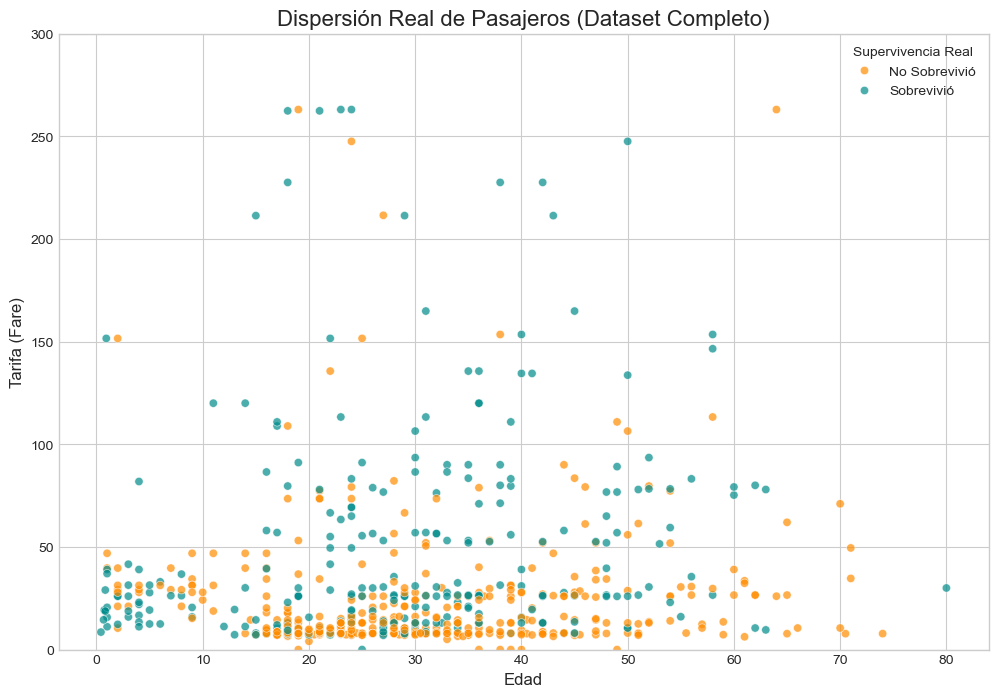


--- Métricas de Evaluación del Modelo ---
✅ Accuracy (Exactitud): 0.8212
🎯 Precision: 0.8000
🔄 Recall: 0.7568
⚖️ F1-Score: 0.7778

--- Matriz de Confusión ---


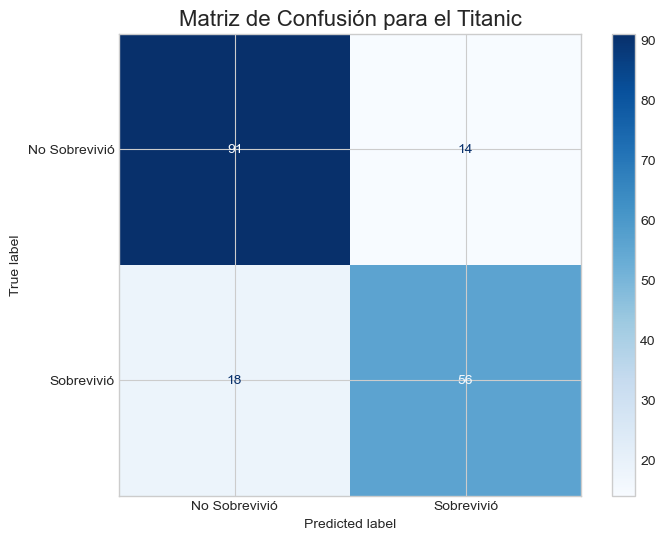


--- Gráfica 'Después': Fronteras de Decisión del RandomForest ---


C:\Users\alans\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


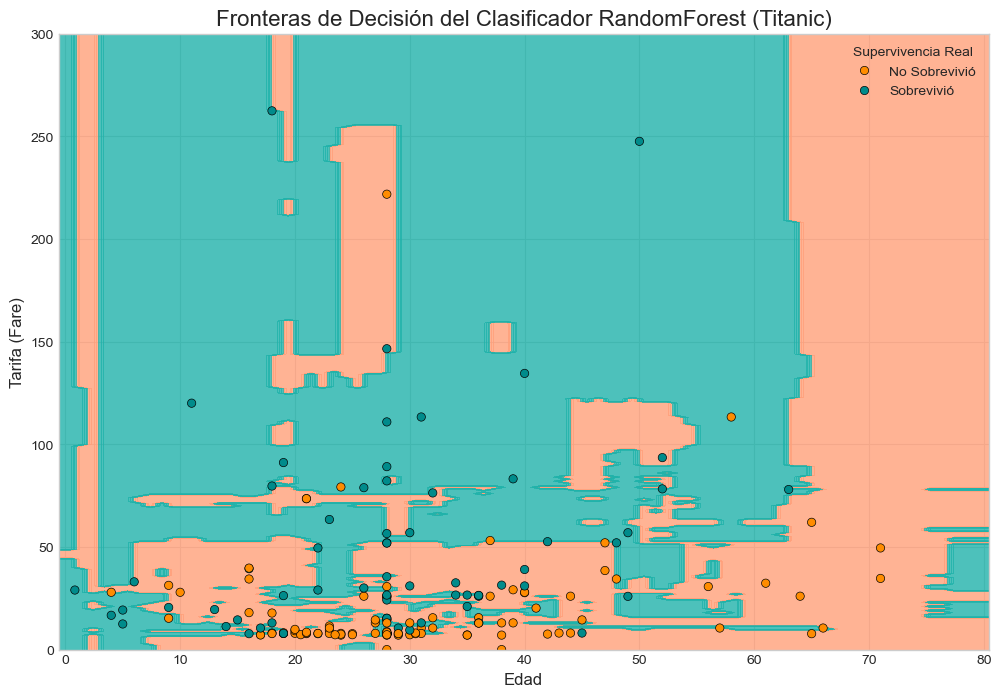

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# --- 1. Carga y Preparación de Datos (Titanic) ---
print("Cargando el dataset del Titanic...")
df = sns.load_dataset('titanic')

# Preprocesamiento de datos
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'
df_processed = df[features + [target]].copy()
df_processed['age'].fillna(df_processed['age'].median(), inplace=True)
df_processed['embarked'].fillna(df_processed['embarked'].mode()[0], inplace=True)
df_processed_full = pd.get_dummies(df_processed, columns=['sex', 'embarked'], drop_first=True)

# Manejar valores nulos que puedan quedar después del preprocesamiento
df_processed_full.dropna(inplace=True)

X_full = df_processed_full.drop('survived', axis=1)
y = df_processed_full['survived']


# --- 2. GRÁFICA "ANTES": Dispersión Real por Edad y Tarifa ---
print("\n--- Gráfica 'Antes': Dispersión Real de Pasajeros por Edad y Tarifa ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

ax = sns.scatterplot(data=df, x='age', y='fare', hue='survived',
                     palette=['darkorange', 'darkcyan'], alpha=0.7)

ax.set_title("Dispersión Real de Pasajeros (Dataset Completo)", fontsize=16)
ax.set_xlabel("Edad", fontsize=12)
ax.set_ylabel("Tarifa (Fare)", fontsize=12)
ax.set_ylim(0, 300)

# Forma correcta de modificar la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Supervivencia Real', labels=['No Sobrevivió', 'Sobrevivió'])
plt.grid(True)
plt.show()


# --- 3. Entrenamiento del Modelo y Métricas ---
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# --- CAMBIO DE MODELO ---
# Usamos RandomForestClassifier. n_estimators=100 crea 100 árboles en el bosque.
clf_full = RandomForestClassifier(n_estimators=100, random_state=42)
clf_full.fit(X_train_full, y_train)
y_pred = clf_full.predict(X_test_full)

print("\n--- Métricas de Evaluación del Modelo ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy (Exactitud): {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔄 Recall: {recall:.4f}")
print(f"⚖️ F1-Score: {f1:.4f}")


# --- 4. Matriz de Confusión ---
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Sobrevivió', 'Sobrevivió'])
fig, ax_cm = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax_cm, cmap=plt.cm.Blues)
ax_cm.set_title('Matriz de Confusión para el Titanic', fontsize=16)
plt.show()



# --- 5. GRÁFICA "DESPUÉS": FRONTERAS DE DECISIÓN ---
print("\n--- Gráfica 'Después': Fronteras de Decisión del RandomForest ---")

# Para la visualización, entrenamos un modelo simple solo con 'age' y 'fare'
features_visual = ['age', 'fare']
X_visual = df_processed_full[features_visual]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visual, y, test_size=0.2, random_state=42)

clf_visual = RandomForestClassifier(n_estimators=100, random_state=42)
clf_visual.fit(X_train_vis, y_train_vis)

h = 1 # Paso en la malla
x_min, x_max = X_visual['age'].min() - 1, X_visual['age'].max() + 1
y_min, y_max = X_visual['fare'].min() - 1, X_visual['fare'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(['#FFA07A', '#20B2AA'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

ax2 = sns.scatterplot(x=X_test_vis['age'], y=X_test_vis['fare'], hue=y_test_vis,
                      palette=['darkorange', 'darkcyan'], alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(0, 300)
plt.title("Fronteras de Decisión del Clasificador RandomForest (Titanic)", fontsize=16)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Tarifa (Fare)", fontsize=12)

# Forma correcta de modificar la leyenda
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, title='Supervivencia Real', labels=['No Sobrevivió', 'Sobrevivió'])
plt.grid(True)
plt.show()

RandomForestClassifier - MNIST

Cargando el dataset MNIST... (puede tardar un momento)
Aplicando PCA para reducir de 784 a 2 dimensiones...

--- Gráfica 'Antes': Dispersión de los dígitos (reducidos a 2D) ---


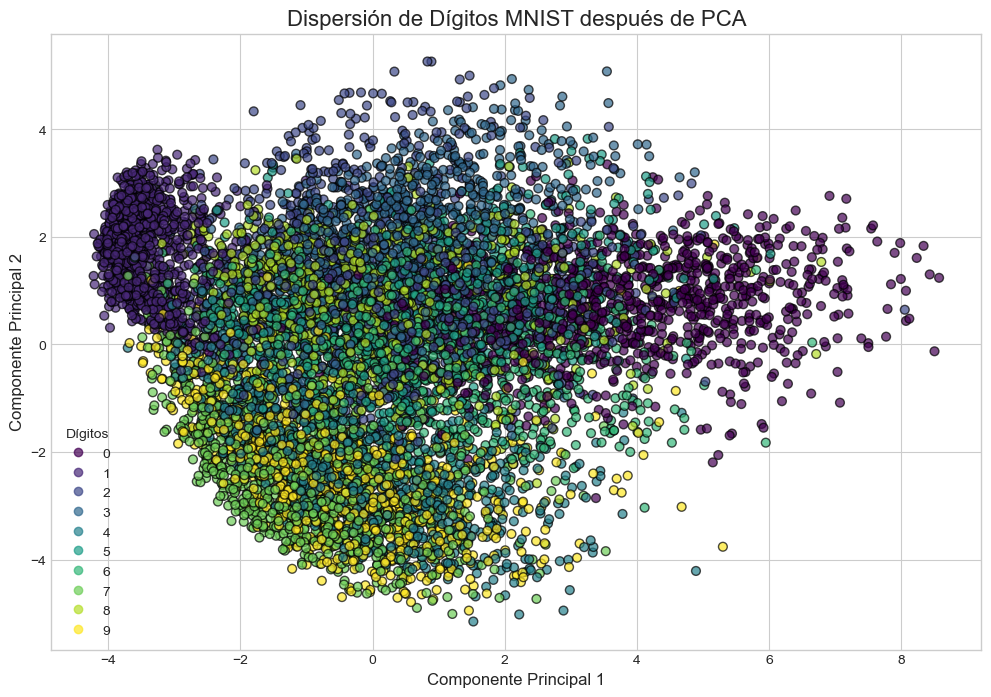


--- Métricas de Evaluación del Modelo ---
✅ Accuracy (Exactitud): 0.4240
🎯 Precision (Promedio Macro): 0.4072
🔄 Recall (Promedio Macro): 0.4134
⚖️ F1-Score (Promedio Macro): 0.4090

--- Matriz de Confusión ---


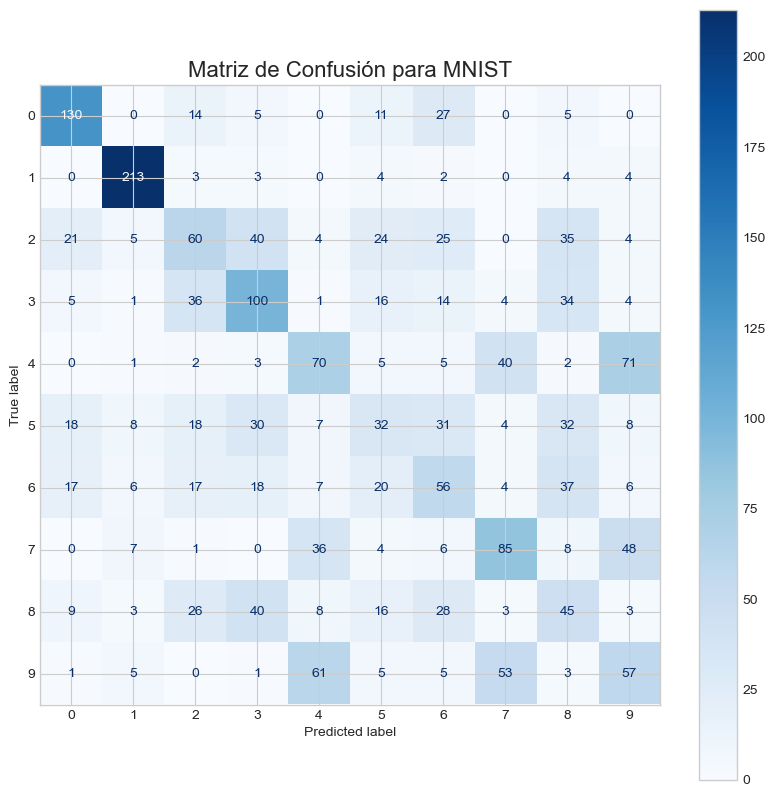


--- Gráfica 'Después': Fronteras de Decisión del RandomForest ---


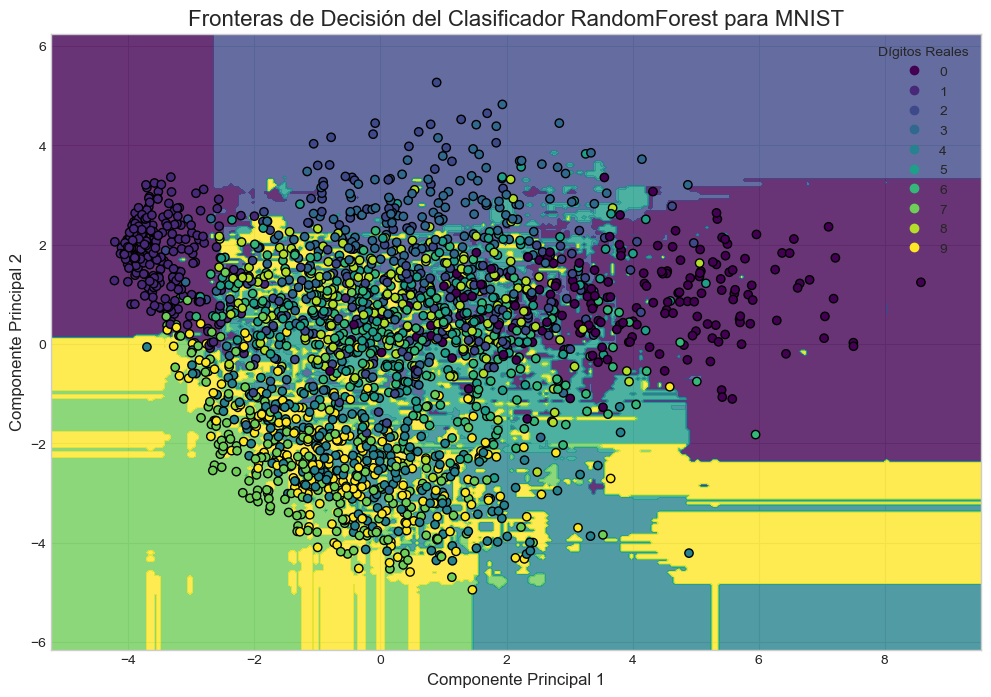

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# --- 1. Carga y Preparación de Datos (MNIST) ---
print("Cargando el dataset MNIST... (puede tardar un momento)")
# Carga los datos desde OpenML.
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Para que el proceso sea más rápido, usaremos una muestra de 10,000 imágenes
sample_indices = np.random.choice(mnist.data.shape[0], 10000, replace=False)
X = mnist.data[sample_indices]
y = mnist.target[sample_indices].astype(int) # Convertir etiquetas a enteros

# Preprocesamiento: Escalar los píxeles de 0-255 a 0-1
X_scaled = X / 255.0

# --- 2. Reducción de Dimensionalidad con PCA ---
print("Aplicando PCA para reducir de 784 a 2 dimensiones...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- 3. GRÁFICA "ANTES": Dispersión de los Dígitos en 2D ---
print("\n--- Gráfica 'Antes': Dispersión de los dígitos (reducidos a 2D) ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# El color (hue) será el dígito real (0-9)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolor='k', s=40)

plt.title("Dispersión de Dígitos MNIST después de PCA", fontsize=16)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)

# Crear una leyenda para los 10 dígitos
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)), title="Dígitos")
plt.grid(True)
plt.show()


# --- 4. Entrenamiento del Modelo y Métricas (sobre los datos PCA) ---
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Usamos RandomForestClassifier. n_estimators=100 crea 100 árboles.
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n--- Métricas de Evaluación del Modelo ---")
# Para problemas multiclase, se debe especificar el tipo de promedio para precision, recall y f1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"✅ Accuracy (Exactitud): {accuracy:.4f}")
print(f"🎯 Precision (Promedio Macro): {precision:.4f}")
print(f"🔄 Recall (Promedio Macro): {recall:.4f}")
print(f"⚖️ F1-Score (Promedio Macro): {f1:.4f}")

# --- 5. Matriz de Confusión ---
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
class_labels = [str(i) for i in range(10)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# La matriz será de 10x10, por lo que necesita más espacio
fig, ax_cm = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax_cm, cmap=plt.cm.Blues)
ax_cm.set_title('Matriz de Confusión para MNIST', fontsize=16)
plt.show()

# --- 6. GRÁFICA "DESPUÉS": FRONTERAS DE DECISIÓN ---
print("\n--- Gráfica 'Después': Fronteras de Decisión del RandomForest ---")

h = .05
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(plt.cm.viridis(np.linspace(0, 1, 10)))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Dibujar los puntos de datos reales del conjunto de prueba
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Fronteras de Decisión del Clasificador RandomForest para MNIST", fontsize=16)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)

# Crear la leyenda para la gráfica final
legend2 = plt.legend(handles=scatter_test.legend_elements()[0], labels=list(range(10)), title="Dígitos Reales")
plt.grid(True)
plt.show()

RandomForestClassifier - Spam vs Ham

Cargando el dataset desde 'spamhamdata.csv'...
Vectorizando texto con TF-IDF...
Aplicando PCA para reducir a 2 dimensiones...

--- Gráfica 'Antes': Dispersión de los mensajes (reducidos a 2D) ---


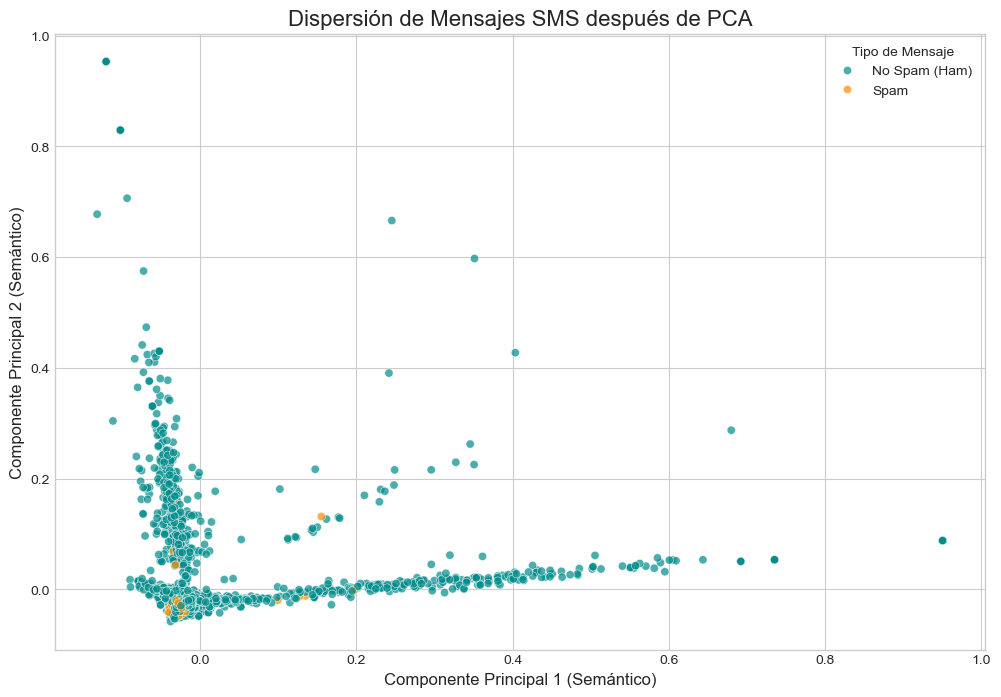


--- Métricas de Evaluación del Modelo ---
✅ Accuracy (Exactitud): 0.9031
🎯 Precision: 0.6814
🔄 Recall: 0.5168
⚖️ F1-Score: 0.5878

--- Matriz de Confusión ---


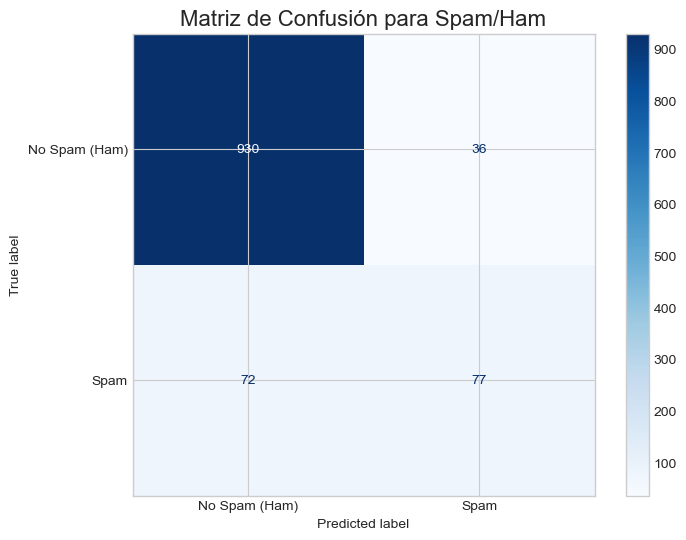


--- Gráfica 'Después': Fronteras de Decisión del RandomForest ---


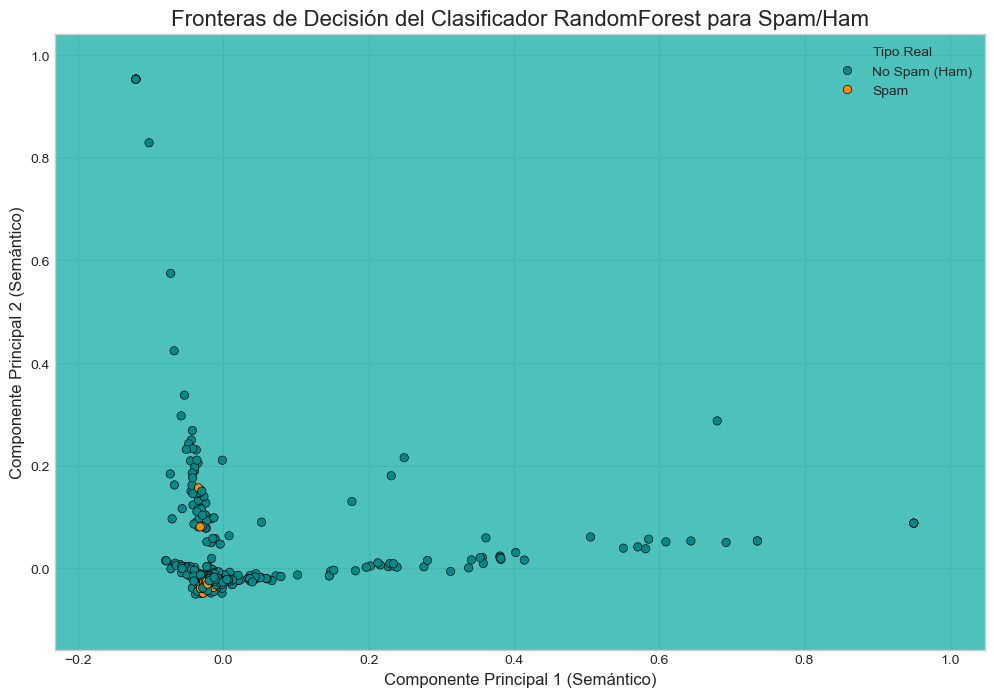

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# --- 1. Carga y Preparación de Datos (Spam vs. Ham) ---
print("Cargando el dataset desde 'spamhamdata.csv'...")
filepath = 'spamhamdata.csv'

try:
    # Usamos sep='\t' porque el archivo está separado por tabulaciones
    df = pd.read_csv(filepath, sep='\t', header=None, names=['label', 'message'], encoding='latin1')
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{filepath}'.")
    print("Asegúrate de que el archivo CSV está en la misma carpeta que tu script de Python.")
    exit()

# Convertir etiquetas a números: 0 para 'ham', 1 para 'spam'
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.dropna(inplace=True) # Eliminar filas vacías si las hubiera

X_text = df['message']
y = df['label_num']

# --- 2. Vectorización de Texto y Reducción de Dimensionalidad ---
print("Vectorizando texto con TF-IDF...")
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X_text)

print("Aplicando PCA para reducir a 2 dimensiones...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# --- 3. GRÁFICA "ANTES": Dispersión de los Mensajes en 2D ---
print("\n--- Gráfica 'Antes': Dispersión de los mensajes (reducidos a 2D) ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

df_pca = pd.DataFrame(X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['label'] = df['label']

ax = sns.scatterplot(data=df_pca, x='Componente 1', y='Componente 2', hue='label',
                     palette=['darkcyan', 'darkorange'], alpha=0.7)

ax.set_title("Dispersión de Mensajes SMS después de PCA", fontsize=16)
ax.set_xlabel("Componente Principal 1 (Semántico)", fontsize=12)
ax.set_ylabel("Componente Principal 2 (Semántico)", fontsize=12)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Tipo de Mensaje', labels=['No Spam (Ham)', 'Spam'])
plt.grid(True)
plt.show()


# --- 4. Entrenamiento del Modelo y Métricas (sobre los datos PCA) ---
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Usamos RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n--- Métricas de Evaluación del Modelo ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy (Exactitud): {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔄 Recall: {recall:.4f}")
print(f"⚖️ F1-Score: {f1:.4f}")

# --- 5. Matriz de Confusión ---
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Spam (Ham)', 'Spam'])
fig, ax_cm = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax_cm, cmap=plt.cm.Blues)
ax_cm.set_title('Matriz de Confusión para Spam/Ham', fontsize=16)
plt.show()

# --- 6. GRÁFICA "DESPUÉS": FRONTERAS DE DECISIÓN ---
print("\n--- Gráfica 'Después': Fronteras de Decisión del RandomForest ---")

h = .02
x_min, x_max = X_pca[:, 0].min() - 0.1, X_pca[:, 0].max() + 0.1
y_min, y_max = X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(['#20B2AA', '#FFA07A'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

ax2 = sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test,
                      palette=['darkcyan', 'darkorange'], alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Fronteras de Decisión del Clasificador RandomForest para Spam/Ham", fontsize=16)
plt.xlabel("Componente Principal 1 (Semántico)", fontsize=12)
plt.ylabel("Componente Principal 2 (Semántico)", fontsize=12)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, title='Tipo Real', labels=['No Spam (Ham)', 'Spam'])
plt.grid(True)
plt.show()